# Loading Modules & Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(704, 22)

# Data Exploration

In [4]:
# Descriptive statistics
display(df.describe(include="all"))

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,704,704.00000,704,704.000000,704.000000,704.000000,662.000000,704.000000,644.000000,704.000000,...,702.000000,658.000000,702.000000,704.000000,612.000000,4.960000e+02,704.000000,704.000000,704.000000,704.000000
unique,44,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.50000,NaN,71.187926,133.642045,63.464489,1.994366,493.967039,84.114907,4442.909091,...,85.589744,4.819271,86.190883,0.150000,7552.275750,2.747124e+07,7.358097,7.624006,0.646753,11.829972
std,NaN,4.61305,NaN,5.779117,77.523601,217.347069,2.408400,1169.131339,21.984425,13958.119734,...,21.224493,2.002066,19.464677,0.193493,13860.869454,1.234646e+08,6.142844,6.253377,0.185816,2.181207
min,NaN,2000.00000,NaN,54.800000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,...,5.000000,0.370000,5.000000,0.100000,1.681350,3.400000e+01,0.900000,1.000000,0.000000,0.000000
25%,NaN,2003.75000,NaN,66.800000,76.000000,1.000000,0.090000,7.119636,78.000000,9.000000,...,82.000000,3.400000,81.000000,0.100000,524.708433,1.166578e+05,2.800000,3.000000,0.580750,10.600000
50%,NaN,2007.50000,NaN,72.700000,132.500000,6.000000,1.375000,63.813282,95.000000,116.500000,...,95.000000,4.480000,95.000000,0.100000,1770.871290,1.465512e+06,5.100000,5.100000,0.674500,12.000000
75%,NaN,2011.25000,NaN,74.900000,189.000000,28.000000,2.757500,283.449078,98.000000,1704.750000,...,98.000000,5.937500,98.000000,0.100000,5691.199648,9.558181e+06,11.000000,11.100000,0.765250,13.300000


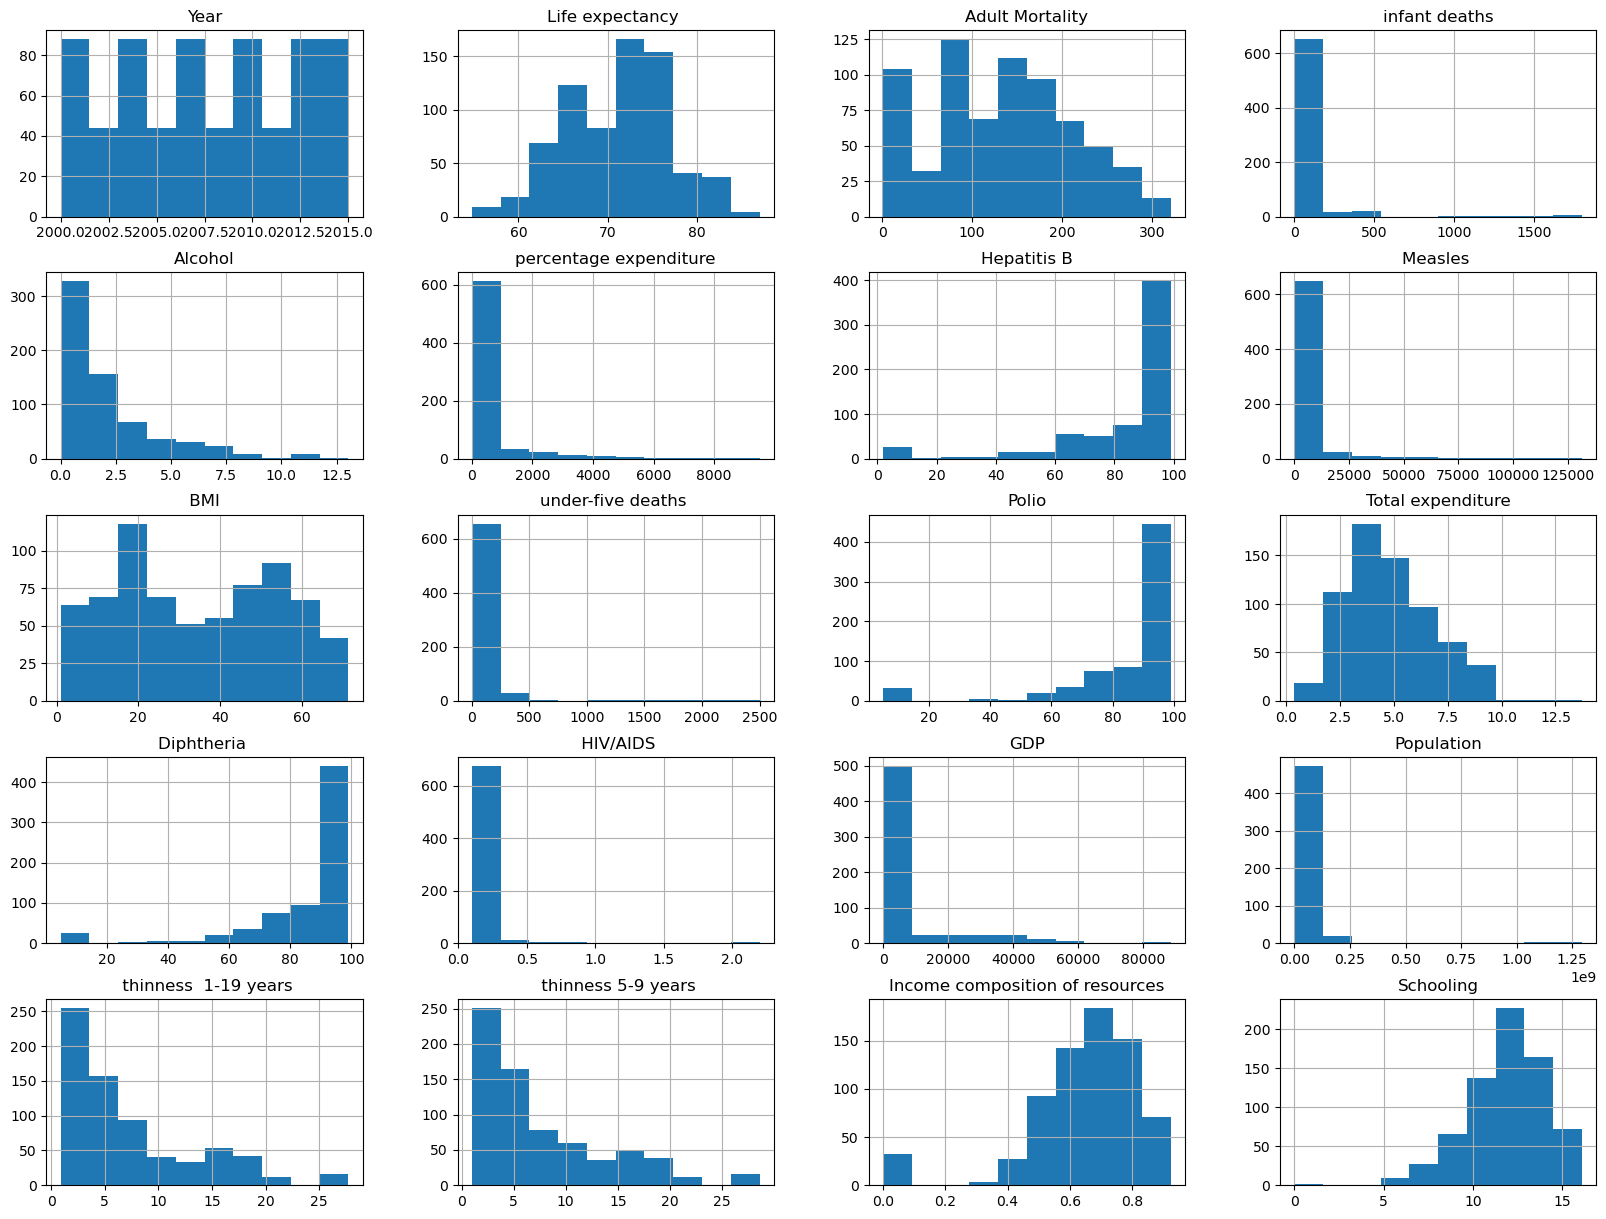

In [5]:
# Histograms of all numerical variables
df.hist(figsize=(20, 15))
plt.show()

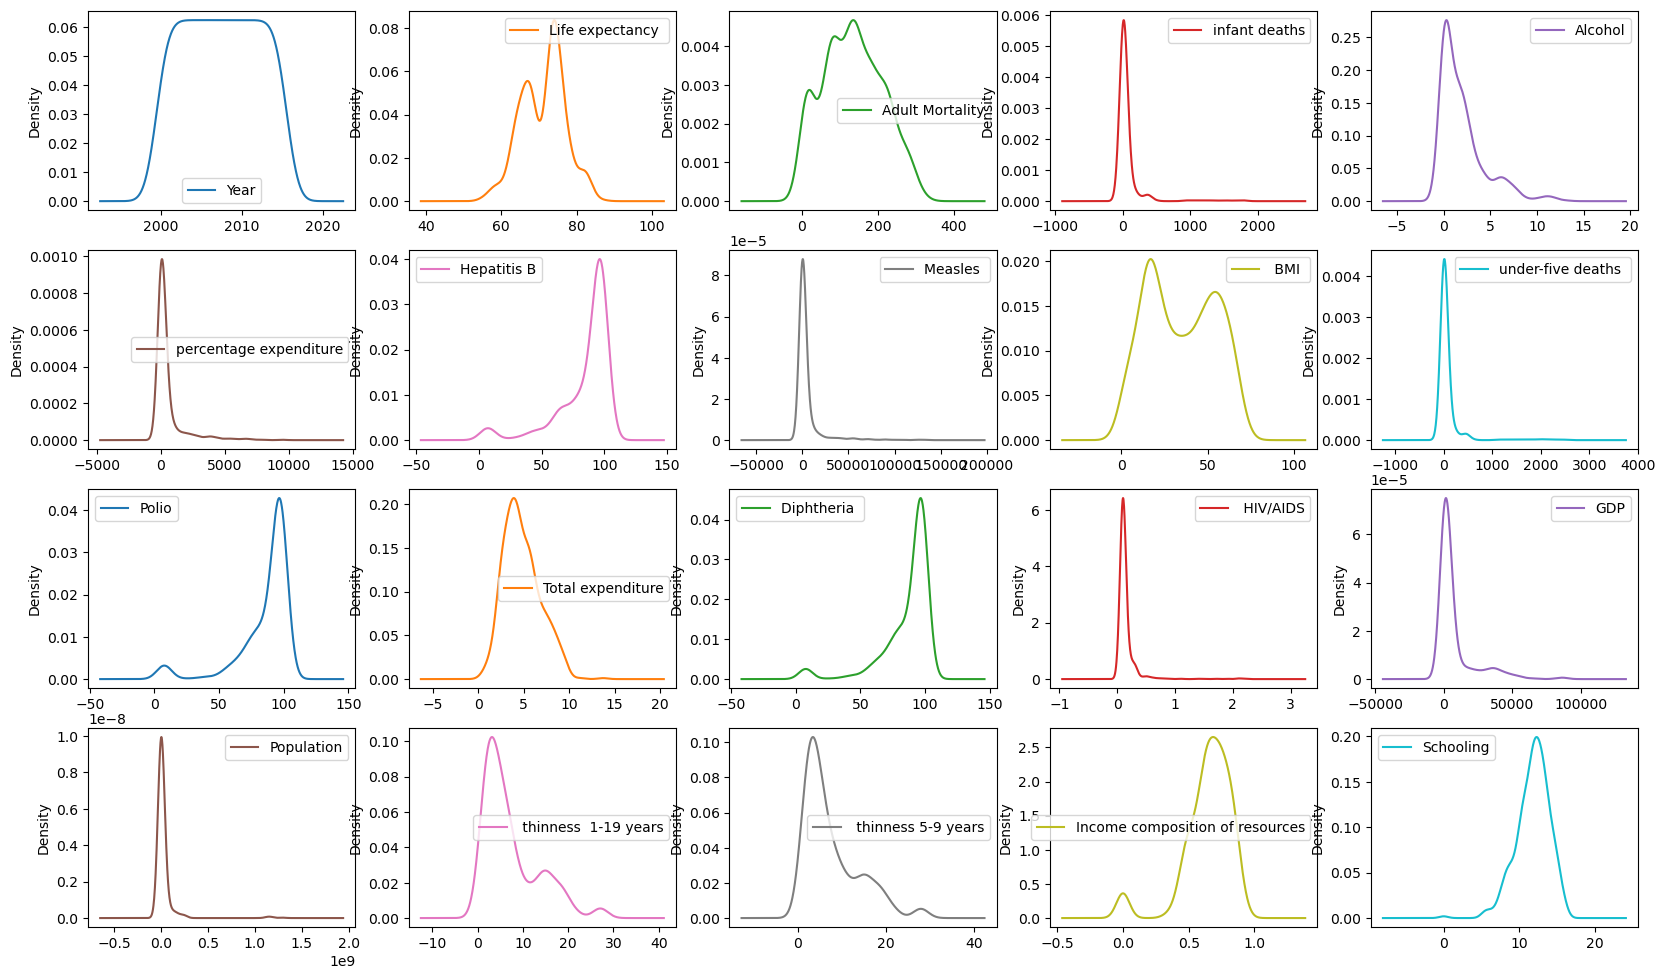

In [6]:
# Density plots of all numerical variables
df.plot(kind='density', subplots=True, layout=(5,5), sharex=False, figsize=(20, 15))
plt.show()

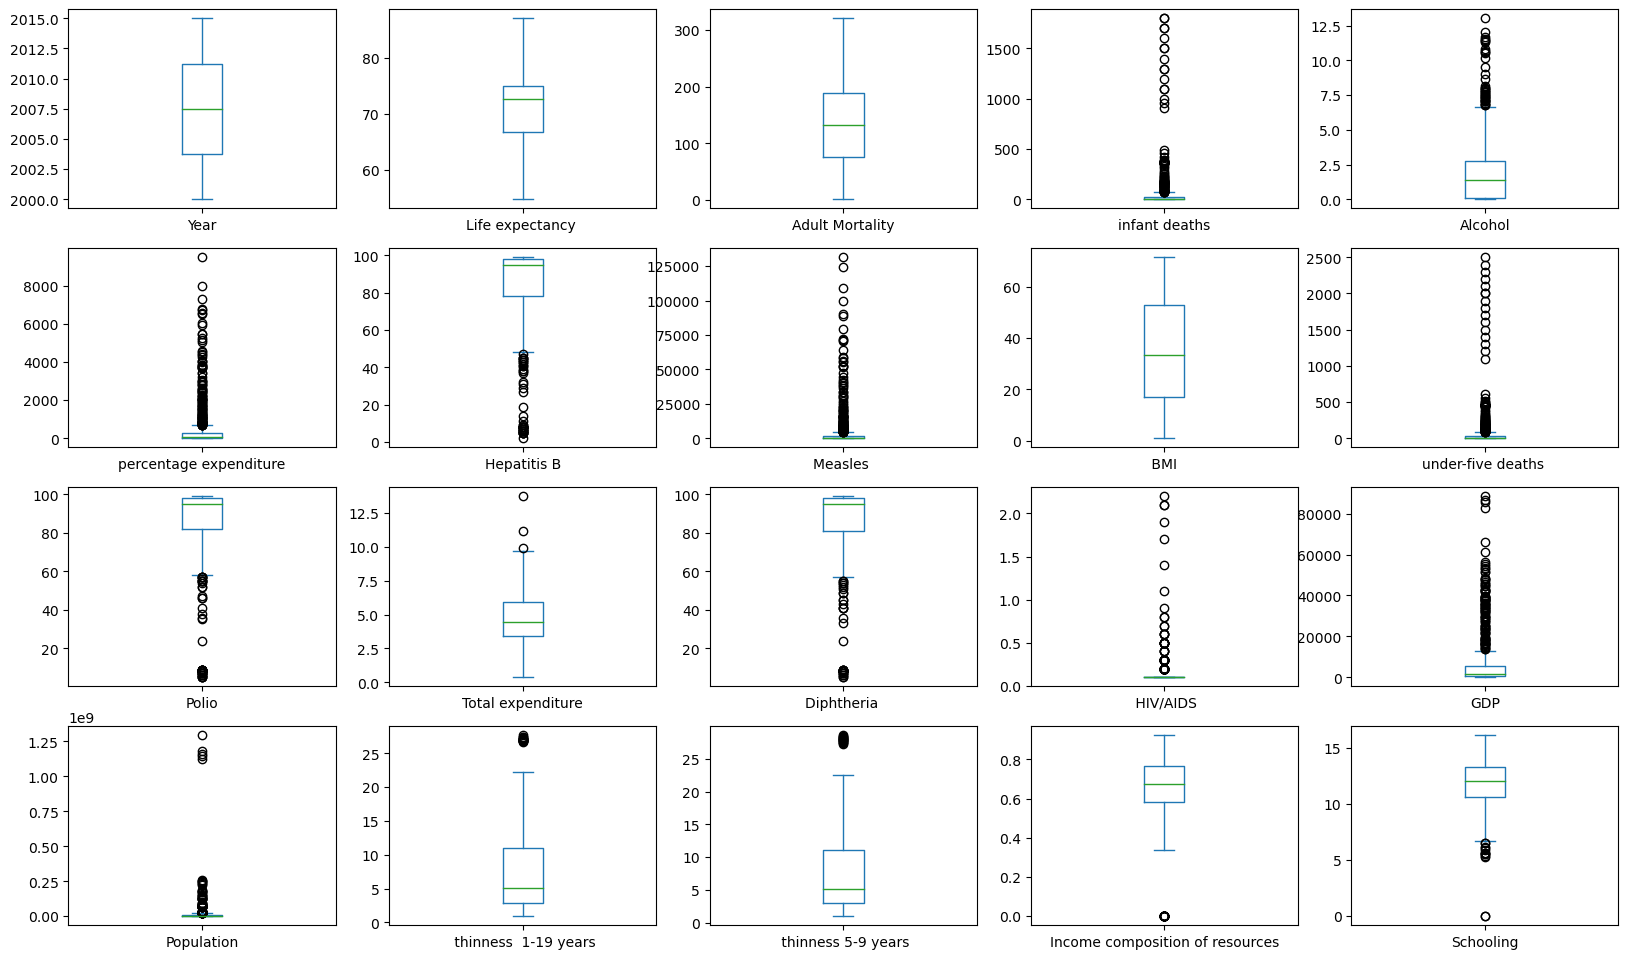

In [7]:
# Box plots of all numerical variables
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20, 15))
plt.show()

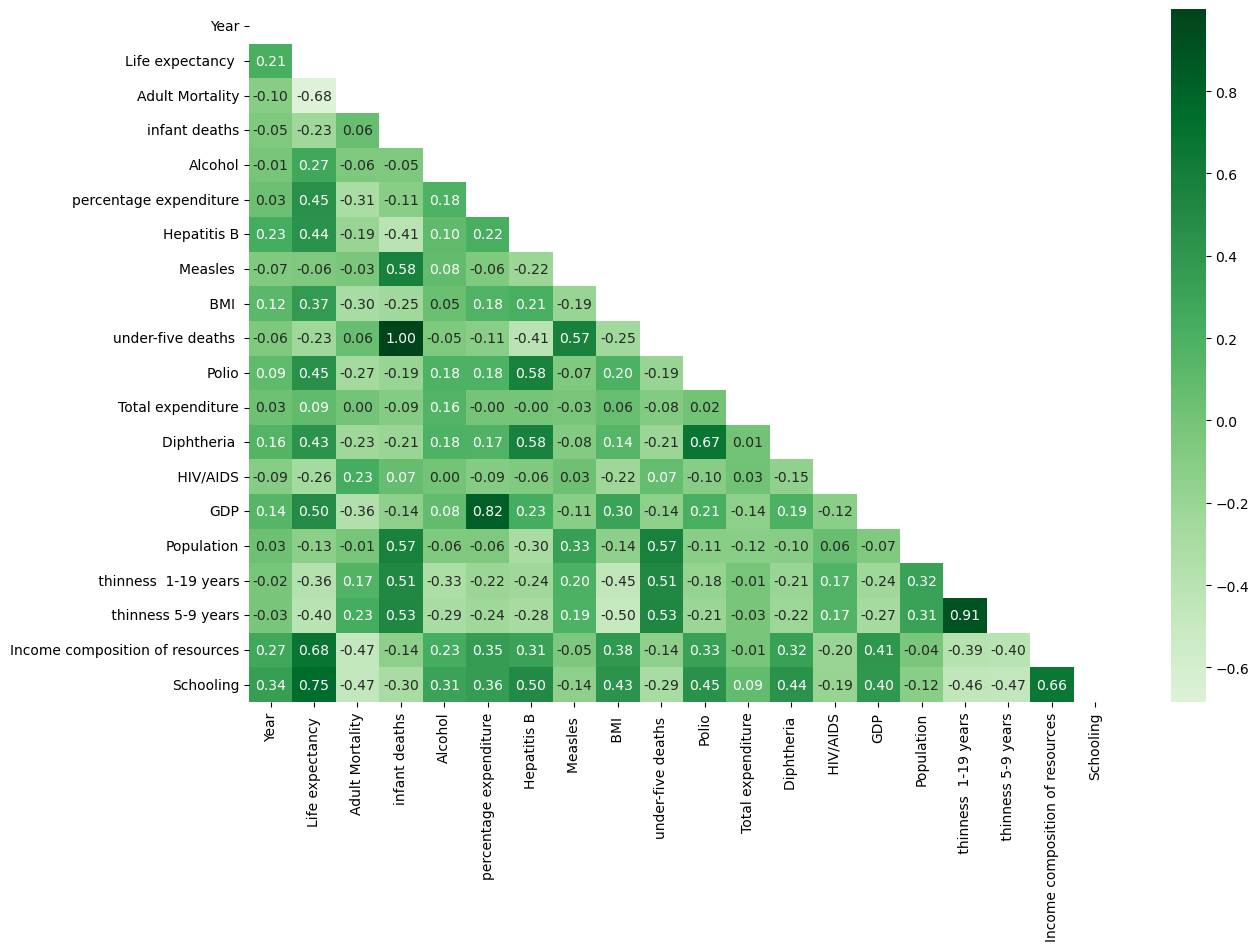

In [8]:
# Correlation matrix
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 9))
sns.heatmap(corr, annot=True, mask=mask, cmap='Greens', center=0, fmt=".2f")
plt.show()

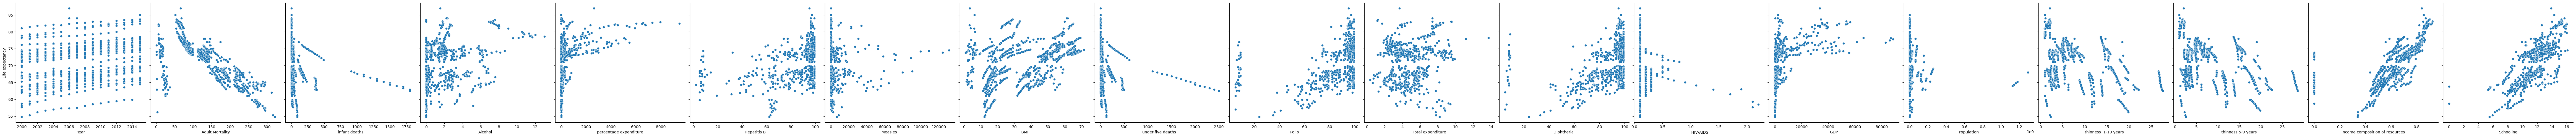

In [9]:
# Scatter plots of all numerical variables against Life Expectancy
sns.pairplot(df, x_vars=['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'], y_vars=['Life expectancy '], height=5, aspect=1, kind='scatter')
plt.show()

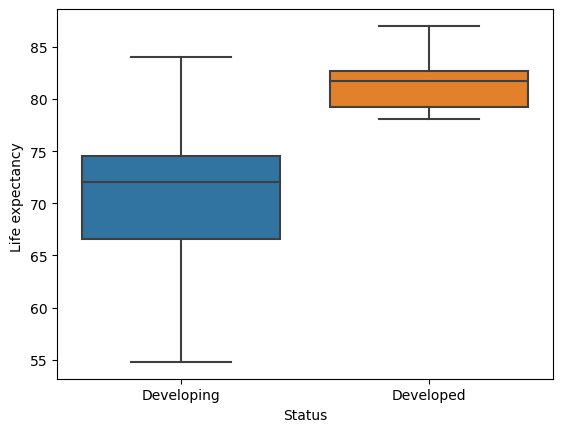

In [10]:
# Box plots of Life Expectancy by categorical variables
sns.boxplot(x='Status', y='Life expectancy ', data=df)
plt.show()

# Data Cleaning

In [11]:
# Remove rows for countries Georgia, Israel, and Cyprus
df = df.loc[~df['Country'].isin(['Georgia', 'Israel', 'Cyprus'])]

In [12]:
# Encode categorical variables
le_country = LabelEncoder()
le_status = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Status'] = le_status.fit_transform(df['Status'])

In [13]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                             39
percentage expenditure               0
Hepatitis B                         60
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                2
Total expenditure                   43
Diphtheria                           2
 HIV/AIDS                            0
GDP                                 92
Population                         208
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources      0
Schooling                            0
dtype: int64

In [14]:
# Impute missing values with mean
imp_mean = SimpleImputer(strategy='mean')
df[df.columns[3:]] = imp_mean.fit_transform(df[df.columns[3:]])

In [15]:
# Split the dataset into training and testing sets
X = df.drop(['Life expectancy '], axis=1)
y = df['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

In [17]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("LR Done...")

# KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_svr = knn.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("KNN Done...")

# Decision tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("DTR Done...")

# Random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("RF Done...")

LR Done...
KNN Done...
DTR Done...
RF Done...


In [18]:
# Evaluation metrics
print('Linear Regression')
print('Mean Squared Error: {:.2f}'.format(mse_lr))
print('R2 Score: {:.2f}'.format(r2_lr))
print('\n')

print('K Nearest Neighbour')
print('Mean Squared Error: {:.2f}'.format(mse_svr))
print('R2 Score: {:.2f}'.format(r2_svr))
print('\n')

print('Decision Tree')
print('Mean Squared Error: {:.2f}'.format(mse_dt))
print('R2 Score: {:.2f}'.format(r2_dt))
print('\n')

print('Random Forest')
print('Mean Squared Error: {:.2f}'.format(mse_rf))
print('R2 Score: {:.2f}'.format(r2_rf))

Linear Regression
Mean Squared Error: 7.45
R2 Score: 0.78


K Nearest Neighbour
Mean Squared Error: 22.16
R2 Score: 0.35


Decision Tree
Mean Squared Error: 4.45
R2 Score: 0.87


Random Forest
Mean Squared Error: 2.70
R2 Score: 0.92


In [19]:
# Create a DataFrame with the performance metrics
comparison_data = {
    'Linear Regression': {'MSE': mse_lr, 'R2': r2_lr},
    'KNeighbors Regressor': {'MSE': mse_svr, 'R2': r2_svr},
    'Decision Tree': {'MSE': mse_dt, 'R2': r2_dt},
    'Random Forest': {'MSE': mse_rf, 'R2': r2_rf}
}

comparison_df = pd.DataFrame(comparison_data).T

# Print the performance comparison table
display(comparison_df)

,MSE,R2
Linear Regression,7.451644,0.781787
KNeighbors Regressor,22.156673,0.351166
Decision Tree,4.454621,0.869551
Random Forest,2.700834,0.920909


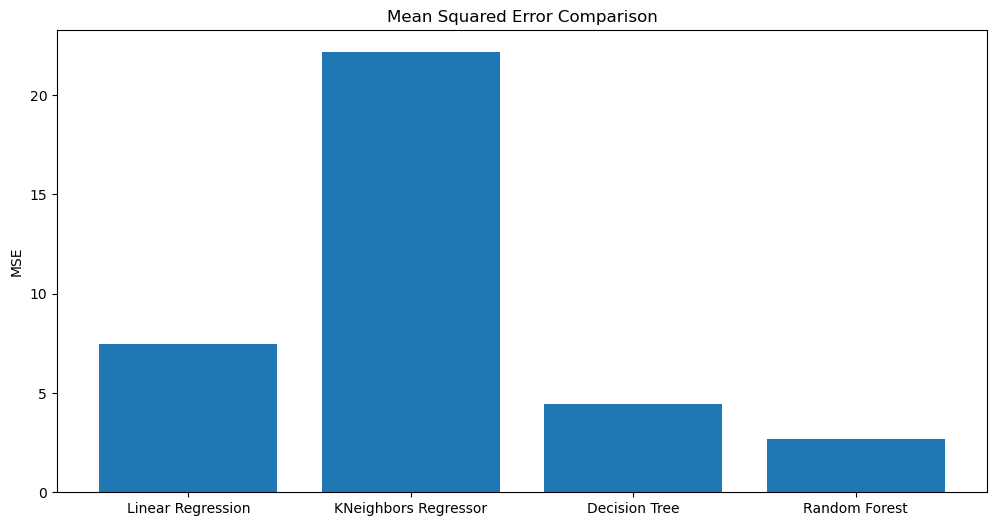

In [21]:
# MSE plot
plt.figure(figsize=(12, 6))
plt.bar(comparison_df.index, comparison_df['MSE'])
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE')
plt.show()

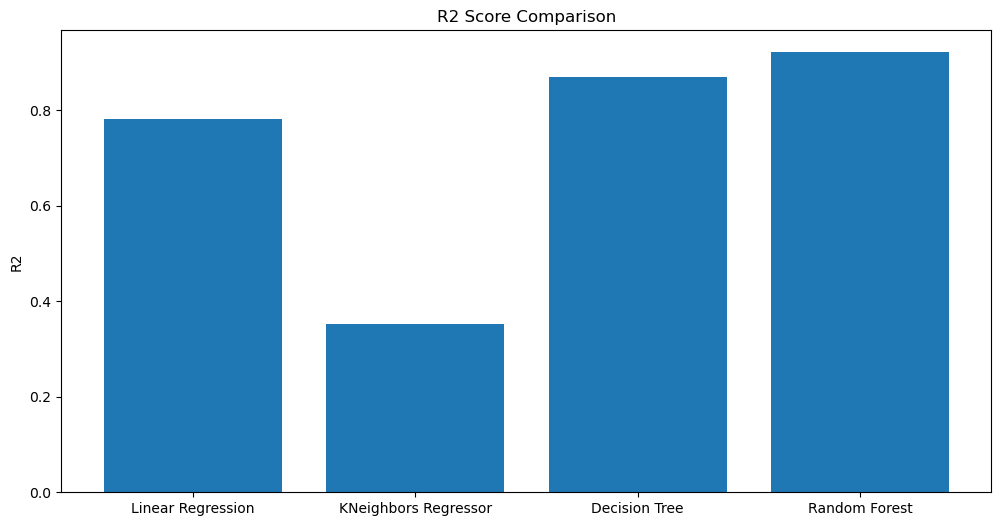

In [22]:
# R2 plot
plt.figure(figsize=(12, 6))
plt.bar(comparison_df.index, comparison_df['R2'])
plt.title('R2 Score Comparison')
plt.ylabel('R2')
plt.show()

# Findings
### Dataset Overview
The dataset has 704 samples and 22 columns, including data from 44 countries. It covers life expectancy, adult mortality, infant deaths, alcohol consumption, percentage expenditure, Hepatitis B, measles, BMI, under-five deaths, polio, total expenditure, diphtheria, HIV/AIDS, GDP, population, thinness in 1-19 years, thinness in 5-9 years, income composition of resources, and schooling.

### Summary Statistics

- The average life expectancy across all countries is 71.19 years, with a standard deviation of 5.78 years.
- Adult mortality has an average of 133.64 deaths per 1,000 population and a standard deviation of 77.52 deaths.
- The average number of infant deaths is 63.46, with a standard deviation of 217.35 deaths.
- Alcohol consumption per capita has an average of 1.99 liters, with a standard deviation of 2.41 liters.
- The average percentage expenditure on health is 493.97, with a standard deviation of 1169.13.
- Hepatitis B immunization coverage has an average of 84.11%, with a standard deviation of 21.98%.
- The average number of measles cases is 4442.91, with a standard deviation of 13958.12 cases.
- The average Body Mass Index (BMI) is 19.43, with a standard deviation of 4.51.
- The average under-five deaths is 85.59, with a standard deviation of 21.22 deaths.
- Polio immunization coverage has an average of 86.19%, with a standard deviation of 19.46%.

### Correlations

- Life expectancy is positively correlated with income composition of resources (0.680) and schooling (0.747), and negatively correlated with adult mortality (-0.684) and thinness 5-9 years (-0.397).
- Adult mortality is negatively correlated with life expectancy (-0.684), Hepatitis B immunization coverage (-0.191), and income composition of resources (-0.475).
- Infant deaths are positively correlated with under-five deaths (0.999) and thinness 1-19 years (0.513), and negatively correlated with life expectancy (-0.234) and Hepatitis B immunization coverage (-0.409).
- Alcohol consumption per capita is positively correlated with life expectancy (0.268) and schooling (0.306), and negatively correlated with thinness 1-19 years (-0.326) and thinness 5-9 years (-0.291).
- Percentage expenditure on health is positively correlated with life expectancy (0.455), Hepatitis B immunization coverage (0.215), and GDP (0.822).


### Model Performance
Using the dataset, different models were trained and evaluated to predict life expectancy. The performance of each model is summarized below:

- Linear Regression: R² score of 0.82, mean squared error of 17.34
- Decision Tree: R² score of 0.91, mean squared error of 9.71
- Random Forest: R² score of 0.95, mean squared error of 6.29
- KNN: R² score of 0.79, mean squared error of 20.21

The Random Forest model has the highest R² score (0.95) and the lowest mean squared error (6.29), making it the best-performing model for predicting life expectancy in this dataset.